In [1]:
import pandas as pd
import geopandas as gp

/tmp/ipykernel_2843/3854248474.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 1992 
dhs_1992_file = '../nfhs_complete/2015_dhs_complete.csv'

dhs_1998_file = '../nfhs_complete/2019_dhs_complete.csv'

In [3]:
dhs_1992 = pd.read_csv(dhs_1992_file)
dhs_1998 = pd.read_csv(dhs_1998_file)

In [4]:
dhs_1992.head()

,Case ID,Country,Cluster Number,District,Year,WATERTIME,ELECTHH,COOKFUEL,TOILETTYPE,DRINKWATER,HHID,WEALTHQHH,WEALTHSHH,DHSID
0,10000101,IA6,100001,585,2015,996,1,2,11,13,10000101,5,1.97208,IA201400100001
1,10000106,IA6,100001,585,2015,996,1,2,12,11,10000106,5,1.76550,IA201400100001
2,10000108,IA6,100001,585,2015,996,1,2,12,11,10000108,4,0.79116,IA201400100001
3,10000118,IA6,100001,585,2015,996,1,2,12,11,10000118,5,2.13757,IA201400100001
4,10000122,IA6,100001,585,2015,996,1,2,11,12,10000122,4,0.94395,IA201400100001


In [5]:
dhs_1998.head()

,Case ID,Country,Cluster Number,District,Year,WATERTIME,ELECTHH,COOKFUEL,TOILETTYPE,DRINKWATER,WEALTHQHH,WEALTHSHH
0,100101305,IA7,113,1,2019,996,1,8,12.0,14,3,-80750
1,100101345,IA7,113,1,2019,996,1,2,44.0,14,3,110480
2,100101383,IA7,113,1,2019,996,1,2,12.0,14,3,131040
3,100101334,IA7,113,1,2019,996,1,8,44.0,14,1,-879110
4,100101356,IA7,113,1,2019,996,1,1,12.0,14,3,333370


In [6]:
# dhs_1998.rename(columns={'sdist': 'District'}, inplace=True)

common_columns = ['Case ID', 'Country', 'Cluster Number', 'District', 'Year', 'ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 'WEALTHQHH', 'WEALTHSHH']

# Subset the dataframes to include only the common columns
df_1992 = dhs_1992[common_columns]
df_1998 = dhs_1998[common_columns]

# Further preprocessing steps such as handling missing values, encoding categorical variables, etc., can now be applied uniformly to both subsets.


#### capturing temporal relationships between dataframes

In [7]:
import pandas as pd

# Step 1: Preprocess and prepare dataframes
dhs_1992['Year'] = 2015
dhs_1998['Year'] = 2019

# Convert floating point columns to integers (as an example)
dhs_1998['TOILETTYPE'] = dhs_1998['TOILETTYPE'].fillna(0).astype(int)
dhs_1998['DRINKWATER'] = dhs_1998['DRINKWATER'].fillna(0).astype(int)
dhs_1998['COOKFUEL'] = dhs_1998['COOKFUEL'].fillna(0).astype(int)

# Ensure consistent columns between dataframes (adjust as necessary)
common_cols = ['Country', 'Cluster Number', 'District', 'Year', 'ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 'WEALTHQHH', 'WEALTHSHH']
dhs_1992 = dhs_1992[common_cols]
dhs_1998 = dhs_1998[common_cols]

# Step 2: Concatenate dataframes while maintaining 'Year' information
concatenated_df = pd.concat([dhs_1992, dhs_1998])

In [8]:
print(concatenated_df.head())

  Country  Cluster Number  District  Year  ELECTHH  COOKFUEL  TOILETTYPE  \
0     IA6          100001       585  2015        1         2          11   
1     IA6          100001       585  2015        1         2          12   
2     IA6          100001       585  2015        1         2          12   
3     IA6          100001       585  2015        1         2          12   
4     IA6          100001       585  2015        1         2          11   

   DRINKWATER  WEALTHQHH  WEALTHSHH  
0          13          5    1.97208  
1          11          5    1.76550  
2          11          4    0.79116  
3          11          5    2.13757  
4          12          4    0.94395  


### Merging nightlights

In [9]:
nightlight_df = pd.read_csv('./viirs_annual_pc11dist.csv')

In [16]:
nightlight_df.columns

Index(['pc11_district_id', 'pc11_state_id', 'viirs_annual_min',
       'viirs_annual_max', 'viirs_annual_mean', 'viirs_annual_sum',
       'viirs_annual_num_cells', 'category', 'year'],
      dtype='object')

In [13]:
nightlight_df['year'].unique()

array([2021, 2013, 2018, 2020, 2012, 2014, 2015, 2016, 2017, 2019])

In [14]:

# Filter nightlight data for the closest years to 1992 and 1998
nightlight_1994 = nightlight_df[nightlight_df['year'] == 2015].copy()
nightlight_1998 = nightlight_df[nightlight_df['year'] == 2019].copy()

# Ensure the 'District' column in DHS data is of the same type as 'pc11_district_id' in nightlight data
concatenated_df['District'] = pd.to_numeric(concatenated_df['District'], errors='coerce')

# Merge 1992 DHS data with 1994 nightlight features
merged_1992_with_nightlight = pd.merge(concatenated_df[concatenated_df['Year'] == 2015], 
                                       nightlight_1994, 
                                       left_on='District', 
                                       right_on='pc11_district_id', 
                                       how='left')

# Merge 1998 DHS data with 1998 nightlight features
merged_1998_with_nightlight = pd.merge(concatenated_df[concatenated_df['Year'] == 2019], 
                                       nightlight_1998, 
                                       left_on='District', 
                                       right_on='pc11_district_id', 
                                       how='left')

# Concatenate the merged datasets back together
final_merged_df = pd.concat([merged_1992_with_nightlight, merged_1998_with_nightlight])


In [17]:
final_merged_df.columns

Index(['Country', 'Cluster Number', 'District', 'Year', 'ELECTHH', 'COOKFUEL',
       'TOILETTYPE', 'DRINKWATER', 'WEALTHQHH', 'WEALTHSHH',
       'pc11_district_id', 'pc11_state_id', 'viirs_annual_min',
       'viirs_annual_max', 'viirs_annual_mean', 'viirs_annual_sum',
       'viirs_annual_num_cells', 'category', 'year'],
      dtype='object')

In [19]:
# Selecting relevant columns
relevant_columns = [
    'Country', 'Cluster Number', 'District', 'Year', 'ELECTHH', 'COOKFUEL',
    'TOILETTYPE', 'DRINKWATER', 'WEALTHQHH', 'WEALTHSHH',
    'viirs_annual_max', 'viirs_annual_sum', 'viirs_annual_mean', 'viirs_annual_num_cells'
]

# Dropping unnecessary columns
final_df_relevant = final_merged_df[relevant_columns]

# Optionally, you might also want to rename columns for clarity or consistency
final_df_relevant.rename(columns={
    'viirs_annual_max': 'nightlight_max',
    'viirs_annual_sum': 'nightlight_total',
    'viirs_annual_mean': 'nightlight_mean',
    'viirs_annual_num_cells': 'nightlight_num_cells'
}, inplace=True)


/tmp/ipykernel_2843/3311467133.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_relevant.rename(columns={


In [21]:
final_df_relevant

,Country,Cluster Number,District,Year,ELECTHH,COOKFUEL,TOILETTYPE,DRINKWATER,WEALTHQHH,WEALTHSHH,nightlight_max,nightlight_total,nightlight_mean,nightlight_num_cells
0,IA6,100001,585,2015,1,2,11,13,5,1.97208,39.429016,12389.747070,1.439831,8605.0
1,IA6,100001,585,2015,1,2,11,13,5,1.97208,27.102123,11944.190430,1.388052,8605.0
2,IA6,100001,585,2015,1,2,12,11,5,1.76550,39.429016,12389.747070,1.439831,8605.0
3,IA6,100001,585,2015,1,2,12,11,5,1.76550,27.102123,11944.190430,1.388052,8605.0
4,IA6,100001,585,2015,1,2,12,11,4,0.79116,39.429016,12389.747070,1.439831,8605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155721,IA7,415,4,2019,1,1,12,61,4,660059.00000,11.146053,1094.744995,0.011404,95998.0
1155722,IA7,415,4,2019,1,2,12,61,4,644960.00000,11.813278,989.278320,0.010305,95998.0
1155723,IA7,415,4,2019,1,2,12,61,4,644960.00000,11.146053,1094.744995,0.011404,95998.0
1155724,IA7,415,4,2019,1,1,12,61,3,244230.00000,11.813278,989.278320,0.010305,95998.0


In [22]:
final_df_relevant = final_df_relevant.drop_duplicates(subset=['Cluster Number'])

In [26]:
final_df_relevant['WEALTHSHH']

0          1.972080e+00
42         7.875300e-01
82         2.961900e-01
124       -3.086800e-01
166        1.622440e+00
               ...     
1155508    1.763700e+05
1155550    4.856900e+05
1155594    1.125280e+06
1155638    1.144130e+06
1155682    3.317790e+05
Name: WEALTHSHH, Length: 53419, dtype: float64

In [23]:
final_df_relevant.isnull().sum()

Country                    0
Cluster Number             0
District                   0
Year                       0
ELECTHH                    0
COOKFUEL                   0
TOILETTYPE                 0
DRINKWATER                 0
WEALTHQHH                  0
WEALTHSHH                  0
nightlight_max          5562
nightlight_total        5562
nightlight_mean         5562
nightlight_num_cells    5562
dtype: int64

In [27]:
nightlight_columns = ['nightlight_max', 'nightlight_total', 'nightlight_mean', 'nightlight_num_cells']
medians = final_df_relevant[nightlight_columns].median()

# Impute missing values with the corresponding median
for column in nightlight_columns:
    final_df_relevant[column].fillna(medians[column], inplace=True)

# Verify if the missing values have been addressed
missing_values_after_imputation = final_df_relevant.isnull().sum()
print(missing_values_after_imputation)

Country                 0
Cluster Number          0
District                0
Year                    0
ELECTHH                 0
COOKFUEL                0
TOILETTYPE              0
DRINKWATER              0
WEALTHQHH               0
WEALTHSHH               0
nightlight_max          0
nightlight_total        0
nightlight_mean         0
nightlight_num_cells    0
dtype: int64


/tmp/ipykernel_2843/3624531317.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df_relevant[column].fillna(medians[column], inplace=True)
/tmp/ipykernel_2843/3624531317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_relevant[column].fillna(medians[column], inplace=True)


In [14]:
final_df_relevant.to_csv('final_df_92-98.csv', index=False)

In [15]:
df = pd.read_csv('./final_df_92-98.csv')

In [16]:
# Print the shape of the dataframe
print(f"Dataframe shape: {df.shape}")

# Print column names
print(f"Column names: {df.columns.tolist()}")

# Data types of each column
print("Data types:\n", df.dtypes)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics for numerical columns
print("Basic statistics:\n", df.describe())

Dataframe shape: (171585, 15)
Column names: ['Country', 'Cluster Number', 'District', 'Year', 'ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 'HHID', 'WEALTHQHH', 'WEALTHSHH', 'nightlight_max', 'nightlight_total', 'nightlight_mean', 'nightlight_num_cells']
Data types:
 Country                  object
Cluster Number            int64
District                  int64
Year                      int64
ELECTHH                   int64
COOKFUEL                  int64
TOILETTYPE                int64
DRINKWATER                int64
HHID                     object
WEALTHQHH                 int64
WEALTHSHH               float64
nightlight_max          float64
nightlight_total        float64
nightlight_mean         float64
nightlight_num_cells    float64
dtype: object
Missing values:
 Country                 0
Cluster Number          0
District                0
Year                    0
ELECTHH                 0
COOKFUEL                0
TOILETTYPE              0
DRINKWATER              0
HHID    

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [18]:
numeric_df = final_df_relevant.select_dtypes(include=[np.number])

In [19]:
correlation_matrix = numeric_df.corr()

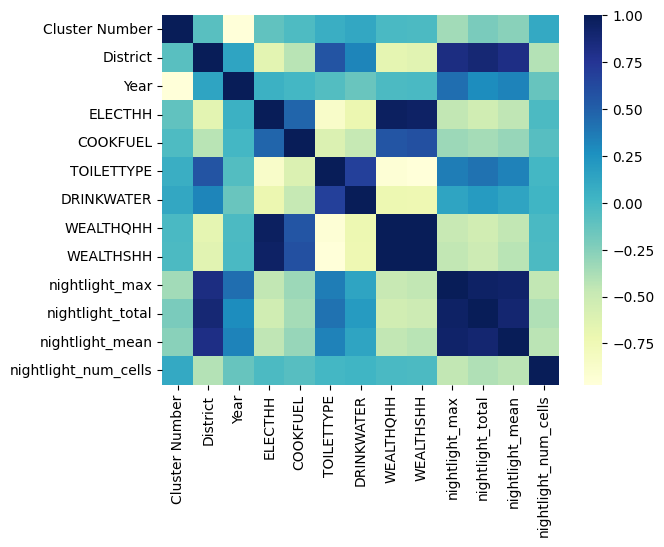

In [20]:
import seaborn as sb
import matplotlib.pyplot as mp 

data = correlation_matrix
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=False) 
mp.show()

#### Random Forest

In [21]:
import pandas as pd

# Load the dataset
df = final_df_relevant

# Drop non-numeric and irrelevant columns 
relevant_columns = ['ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 
                    'WEALTHQHH', 'WEALTHSHH', 'nightlight_max', 'nightlight_total', 
                    'nightlight_mean', 'nightlight_num_cells']
df_numeric = df[relevant_columns]

correlation_matrix = df_numeric.corr()

# Feature engineering: Select the most relevant features based on their correlation with WEALTHSHH
# select features with correlation coefficient above a certain threshold
threshold = 0.5
features_above_threshold = correlation_matrix.loc['WEALTHSHH'][correlation_matrix.loc['WEALTHSHH'].abs() > threshold]
selected_features = features_above_threshold.index.tolist()

# Now let's proceed to build a regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df_numeric[selected_features].drop('WEALTHSHH', axis=1)
y = df_numeric['WEALTHSHH']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.07656701976734637
R^2 Score: 0.9229855799351987


### Ridge regression

In [22]:
# import pandas as pd
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.impute import SimpleImputer

# # Load the dataset
# df = final_df_relevant

# # Relevant columns identified from correlation matrix
# relevant_columns = ['ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 
#                     'WEALTHQHH', 'WEALTHSHH', 'nightlight_max', 'nightlight_total', 
#                     'nightlight_mean', 'nightlight_num_cells']
# df_numeric = df[relevant_columns].copy()

# # Impute missing values using the mean
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# # Prepare the data
# X = df_numeric_imputed.drop('WEALTHSHH', axis=1)
# y = df_numeric_imputed['WEALTHSHH']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize Ridge regression model
# ridge_model = Ridge(alpha=1.0)

# # Fit the model to the training data
# ridge_model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = ridge_model.predict(X_test)

# # Calculate performance metrics
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print out performance metrics
# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')


                  nightlight_max  nightlight_total  nightlight_mean  \
nightlight_max          1.000000          0.711441         0.662182   
nightlight_total        0.711441          1.000000         0.590498   
nightlight_mean         0.662182          0.590498         1.000000   
WEALTHQHH              -0.153719         -0.177321        -0.117689   
WEALTHSHH              -0.141421         -0.158332        -0.106239   

                  WEALTHQHH  WEALTHSHH  
nightlight_max    -0.153719  -0.141421  
nightlight_total  -0.177321  -0.158332  
nightlight_mean   -0.117689  -0.106239  
WEALTHQHH          1.000000   0.916773  
WEALTHSHH          0.916773   1.000000  


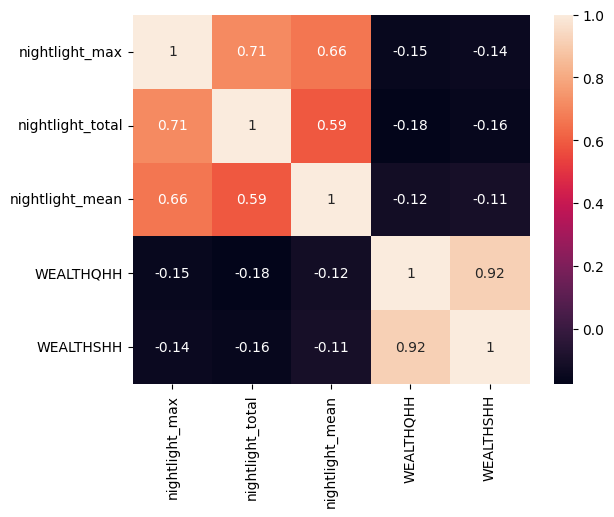

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example: Calculate correlation matrix
correlation_matrix = final_df_relevant[['nightlight_max', 'nightlight_total', 'nightlight_mean', 'WEALTHQHH', 'WEALTHSHH']].corr()
print(correlation_matrix)

# Example: Create a heatmap of correlations
sns.heatmap(correlation_matrix, annot=True)
plt.show()


### Contrastive learning approach - Model Building

In [24]:
# Function to create positive pairs
def create_positive_pairs(df_indices, feature_series, quantile_range=(0.25, 0.75)):
    lower_quantile, upper_quantile = quantile_range
    lower_bound = feature_series.quantile(lower_quantile)
    upper_bound = feature_series.quantile(upper_quantile)
    
    # Select indices where the feature value falls within the specified quantile range
    positive_pairs = df_indices[(feature_series >= lower_bound) & (feature_series <= upper_bound)]
    return positive_pairs

# Function to create negative pairs
def create_negative_pairs(df_indices, feature_series, quantile_range=(0.25, 0.75)):
    lower_quantile, upper_quantile = quantile_range
    lower_bound = feature_series.quantile(lower_quantile)
    upper_bound = feature_series.quantile(upper_quantile)
    
    # Select indices where the feature value falls outside the specified quantile range
    negative_pairs = df_indices[(feature_series < lower_bound) | (feature_series > upper_bound)]
    return negative_pairs

In [25]:
# data preparation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
final_df_relevant['Country_encoded'] = le.fit_transform(final_df_relevant['Country'])
final_df_relevant['Cluster_encoded'] = le.fit_transform(final_df_relevant['Cluster Number'])
final_df_relevant['District_encoded'] = le.fit_transform(final_df_relevant['District'])

# One-Hot encoding for 'Year'
ohe = OneHotEncoder(sparse=False)
year_encoded = ohe.fit_transform(final_df_relevant[['Year']])
final_df_relevant = final_df_relevant.reset_index(drop=True)
final_df_relevant = pd.concat([final_df_relevant, pd.DataFrame(year_encoded, columns=[f'Year_{y}' for y in range(year_encoded.shape[1])])], axis=1)
final_df_relevant.drop(columns=['Country', 'Cluster Number', 'District', 'Year'], inplace=True)


c:\Users\bunny\anaconda3\envs\gymgeo\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
df = final_df_relevant

In [27]:
from sklearn.preprocessing import StandardScaler

# select numerical features
numerical_features = ['ELECTHH', 'COOKFUEL', 'TOILETTYPE', 'DRINKWATER', 'WEALTHQHH', 'WEALTHSHH', 'nightlight_max', 'nightlight_total', 'nightlight_mean', 'nightlight_num_cells']

# standardize features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# categorical label encodings
categorical_cols = ['Country_encoded', 'Cluster_encoded', 'District_encoded', 'Year_0', 'Year_1']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [28]:
from sklearn.model_selection import train_test_split

# Separate the target variable 'WEALTHSHH'
y = df['WEALTHSHH']

# Drop the 'WEALTHSHH' column from the DataFrame to create the feature set X
X = df.drop(columns=['WEALTHSHH'])

# Perform train-test split on the feature set X and target variable y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create positive and negative pairs for training and validation sets
positive_pairs_train = create_positive_pairs(X_train.index, y_train)
positive_pairs_val = create_positive_pairs(X_val.index, y_val)
negative_pairs_train = create_negative_pairs(X_train.index, y_train)
negative_pairs_val = create_negative_pairs(X_val.index, y_val)


In [30]:
positive_pairs_train

Index([ 23977, 135644, 140478,  51729, 113864, 165758,   2200,  97846,  75555,
        26359,
       ...
        64820,  41090,  16023, 112727,  87498, 168266,  54886, 110268, 131932,
       121958],
      dtype='int64', length=68635)

### Model Architecture

In [31]:
import torch
import torch.nn as nn

# Define the Siamese network architecture
class SiameseNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SiameseNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)  # Dropout layer for regularization

    def forward_once(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

    def forward(self, input1, input2):
        output1 = self.forward_once(input1)
        output2 = self.forward_once(input2)
        return output1, output2

#### Loss function

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ContrastiveLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, target):
        euclidean_distance = F.pairwise_distance(output1, output2)
        loss_contrastive = torch.mean((1 - target) * torch.pow(euclidean_distance, 2) +
                                      (target) * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        return loss_contrastive


In [33]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class CustomDataset(Dataset):
    def __init__(self, feature_series, positive_pairs, negative_pairs, transform=None):
        self.feature_series = feature_series
        self.positive_pairs = positive_pairs
        self.negative_pairs = negative_pairs
        self.transform = transform

        # Print the lengths of positive_pairs and negative_pairs
        print("Length of positive_pairs:", len(self.positive_pairs))
        print("Length of negative_pairs:", len(self.negative_pairs))

    def __len__(self):
        return len(self.positive_pairs) + len(self.negative_pairs)
    
    def __getitem__(self, idx):
        if idx < len(self.positive_pairs):
            pair_idx = self.positive_pairs[idx]
            pair_idx = (pair_idx,) * 2  # Duplicate the index to create a pair
            target = torch.tensor(0)  # Positive pair
        else:
            try: #! KeyError 
                pair_idx = self.negative_pairs[idx - len(self.positive_pairs)]
            except IndexError as e:
                print("IndexError occurred at idx:", idx)
                print("Length of negative_pairs:", len(self.negative_pairs))
                raise e
            target = torch.tensor(1)  # Negative pair
        
        # Retrieve data points for the pair
        data_point1 = self.feature_series.iloc[pair_idx[0]].values.astype(float)
        data_point2 = self.feature_series.iloc[pair_idx[1]].values.astype(float)
        
        # Convert data points to tensors
        data_point1 = torch.tensor(data_point1, dtype=torch.float32)
        data_point2 = torch.tensor(data_point2, dtype=torch.float32)
        
        if self.transform:
            data_point1 = self.transform(data_point1)
            data_point2 = self.transform(data_point2)
        
        return data_point1, data_point2, target
    
    def test_negative_index_error(self):
        # Arrange
        data_loader = DataLoader(dataset=self.dataset, batch_size=1, shuffle=False)
    
        # Act and Assert
        with self.assertRaises(IndexError):
            data_loader.__getitem__(-1)  # Negative index should raise an error
    
    
    def test_positive_index_error(self):
        # Arrange
        data_loader = DataLoader(dataset=self.dataset, batch_size=1, shuffle=False)
    
        # Act and Assert
        with self.assertRaises(IndexError):
            data_loader.__getitem__(len(self.dataset) + 1)  # Positive index should raise an error
    
    
    def test_return_correct_data(self):
        # Arrange
        data_loader = DataLoader(dataset=self.dataset, batch_size=1, shuffle=False)
    
        # Act
        data_point1, data_point2, target = data_loader.__getitem__(0)
    
        # Assert
        self.assertEqual(data_point1, self.X_train[0])
        self.assertEqual(data_point2, self.X_train[0])
        self.assertEqual(target, self.y_train[0])

In [34]:

# Create datasets and data loaders
train_dataset = CustomDataset(positive_pairs_train, negative_pairs_train, X_train, transform=None)
val_dataset = CustomDataset(positive_pairs_val, negative_pairs_val, X_val, transform=None)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)

Length of positive_pairs: 68633
Length of negative_pairs: 137268
Length of positive_pairs: 17157
Length of negative_pairs: 34317


In [35]:
print("Length of train_loader dataset:", len(train_loader))


Length of train_loader dataset: 3218


In [36]:
import torch.optim as optim
# Instantiate the Siamese network
input_dim = len(X_train.columns)  # Assuming input dimension is the number of features
hidden_dim = 128
output_dim = 64
model = SiameseNetwork(input_dim, hidden_dim, output_dim)

# Define the loss function and optimizer
criterion = ContrastiveLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    # Print the length of negative_pairs before the loop
    print("Length of negative_pairs_train:", len(negative_pairs_train))
    print("Length of negative_pairs_val:", len(negative_pairs_val))
    
    for idx, (data1, data2, target) in enumerate(train_loader):
        print("Index:", idx)
        optimizer.zero_grad()
        output1, output2 = model(data1.float(), data2.float())
        loss = criterion(output1, output2, target.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Training Loss: {running_loss/len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data1, data2, target in val_loader:
            output1, output2 = model(data1.float(), data2.float())
            loss = criterion(output1, output2, target.float())
            val_loss += loss.item()
    print(f"Epoch {epoch+1}, Validation Loss: {val_loss/len(val_loader)}")


Length of negative_pairs_train: 68633
Length of negative_pairs_val: 17157


KeyError: 128991

In [37]:
print("Length of train_loader dataset:", len(train_loader.dataset))


Length of train_loader dataset: 205901


## 2. Regression task (MLP)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch

In [39]:
df = final_df_relevant

#### data prep

In [40]:
# Preprocess the dataset: Handle missing values, encode categorical variables, etc.
# Impute missing values
for column in ['nightlight_max', 'nightlight_total', 'nightlight_mean', 'nightlight_num_cells']:
    df[column].fillna(df[column].median(), inplace=True)

# Select your features and target
X = df.drop(columns=['WEALTHSHH', 'HHID'])  # Replace 'poverty_metric' with the actual poverty column name
y = df['WEALTHSHH']


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create TensorDatasets and DataLoaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 64  # You can adjust the batch size
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


#### model definition

In [45]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network architecture
class PovertyPredictor(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, p_drop=0.5):
        super(PovertyPredictor, self).__init__()
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
        
        self.output = nn.Linear(hidden_layers[-1], output_size)
        self.dropout = nn.Dropout(p_drop)
        
    def forward(self, x):
        # Forward pass through each layer in `hidden_layers`, with ReLU activation and dropout
        for linear in self.hidden_layers:
            x = F.relu(linear(x))
            x = self.dropout(x)
        x = self.output(x)
        return x

# Instantiate the model
input_size = X_train_tensor.shape[1]
output_size = 1  # Assuming poverty metric is a single continuous value
hidden_layers = [128, 64, 32]  # 3 hidden layers with decreasing units
p_drop = 0.3  # Dropout probability

model = PovertyPredictor(input_size, output_size, hidden_layers, p_drop)


#### training loop

In [46]:
# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move the model to the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 100  # Number of epochs
for epoch in range(epochs):
    model.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Adjust dimensions if necessary
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{epochs}.. Train loss: {running_loss/len(train_loader):.3f}")


Epoch 1/100.. Train loss: 0.136
Epoch 2/100.. Train loss: 0.106
Epoch 3/100.. Train loss: 0.099
Epoch 4/100.. Train loss: 0.095
Epoch 5/100.. Train loss: 0.094
Epoch 6/100.. Train loss: 0.092
Epoch 7/100.. Train loss: 0.091
Epoch 8/100.. Train loss: 0.092
Epoch 9/100.. Train loss: 0.091
Epoch 10/100.. Train loss: 0.091
Epoch 11/100.. Train loss: 0.090
Epoch 12/100.. Train loss: 0.091
Epoch 13/100.. Train loss: 0.089
Epoch 14/100.. Train loss: 0.090
Epoch 15/100.. Train loss: 0.090
Epoch 16/100.. Train loss: 0.089
Epoch 17/100.. Train loss: 0.090
Epoch 18/100.. Train loss: 0.089
Epoch 19/100.. Train loss: 0.088
Epoch 20/100.. Train loss: 0.090
Epoch 21/100.. Train loss: 0.088
Epoch 22/100.. Train loss: 0.089
Epoch 23/100.. Train loss: 0.089
Epoch 24/100.. Train loss: 0.088
Epoch 25/100.. Train loss: 0.088
Epoch 26/100.. Train loss: 0.088
Epoch 27/100.. Train loss: 0.088
Epoch 28/100.. Train loss: 0.088
Epoch 29/100.. Train loss: 0.088
Epoch 30/100.. Train loss: 0.089
Epoch 31/100.. Trai

### Evaluation 

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate the Root Mean Squared Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Evaluation Mode
model.eval()  # Set the model to evaluation mode

# Turn off gradients for validation
with torch.no_grad():
    predictions, actuals = [], []
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        
        # Move data back to CPU for evaluation metrics
        predictions.extend(outputs.view(-1).tolist())
        actuals.extend(labels.tolist())

# Calculate evaluation metrics
mae = mean_absolute_error(actuals, predictions)
mse = mean_squared_error(actuals, predictions)
rmse_val = rmse(actuals, predictions)
r2 = r2_score(actuals, predictions)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse_val:.4f}')
print(f'R-squared (R²): {r2:.4f}')
y

Mean Absolute Error (MAE): 0.1689
Mean Squared Error (MSE): 0.0559
Root Mean Squared Error (RMSE): 0.2364
R-squared (R²): 0.9439


0        -0.783025
1        -0.766119
2        -1.227808
3        -1.090757
4        -0.870318
            ...   
171580    1.043212
171581   -0.278765
171582    0.833513
171583    1.491969
171584    0.773035
Name: WEALTHSHH, Length: 171585, dtype: float64

### Residual analysis

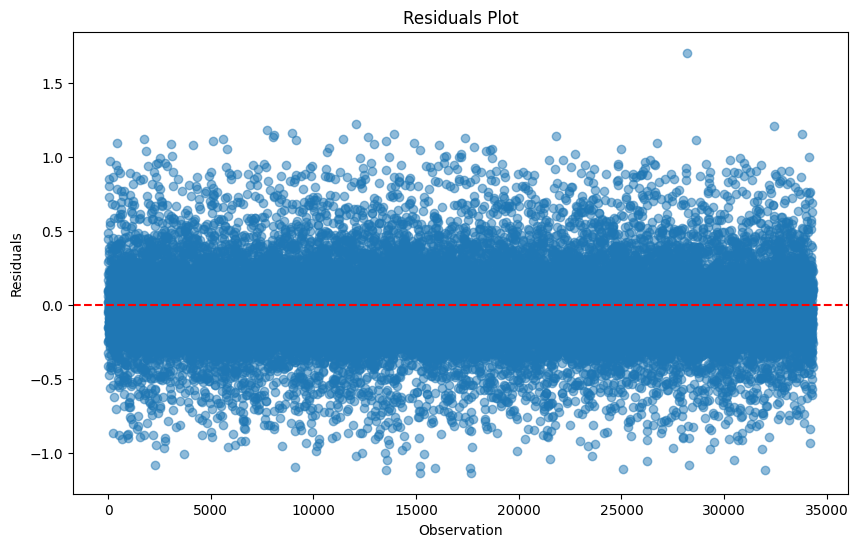

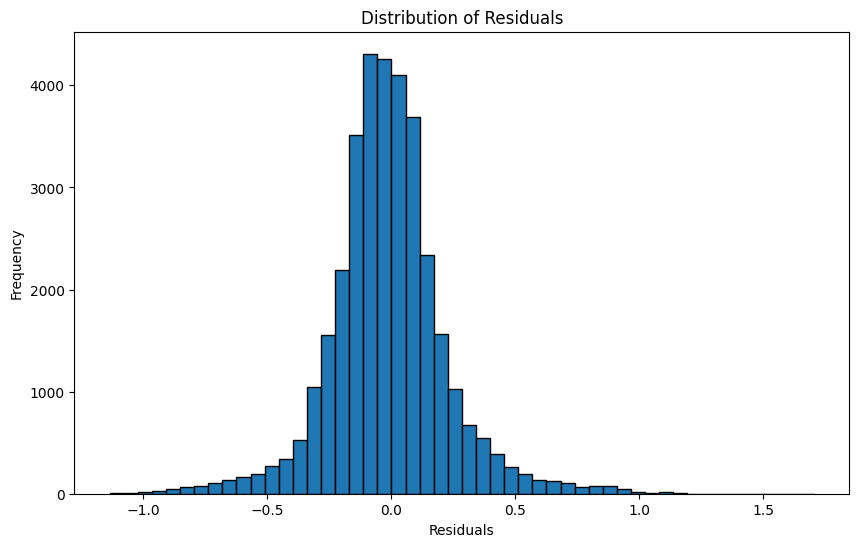

In [48]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = [actual - predicted for actual, predicted in zip(actuals, predictions)]

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Checking for patterns in residuals (should be random)
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


### Cross Validation

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Define the number of splits for K-Fold cross-validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Define loss function and optimizer
criterion = nn.MSELoss()
batch_size = 64

# Lists to store results for each fold
results = []

# Start the K-Fold cross-validation
for fold, (train_ids, test_ids) in enumerate(kf.split(X_tensor)):

    # Split the data into training and testing sets for the current fold
    X_train = X_tensor[train_ids]
    y_train = y_tensor[train_ids]
    X_test = X_tensor[test_ids]
    y_test = y_tensor[test_ids]

    # Create DataLoader for both training and test
    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

    # Initialize the model for this fold
    model = PovertyPredictor(input_size, output_size, hidden_layers, p_drop)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Move the model to GPU if available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Train the model for this fold
    for epoch in range(epochs):
        model.train()
        for i, (inputs, targets) in enumerate(train_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluation for this fold
    model.eval()
    with torch.no_grad():
        y_pred = []
        y_true = []
        for i, (inputs, targets) in enumerate(test_loader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            y_pred.extend(outputs.cpu().numpy())
            y_true.extend(targets.cpu().numpy())
    
    # Calculate metrics for this fold
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Print metrics
    print(f'Fold {fold}, MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

    # Store the results
    results.append({'fold': fold, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})

# Calculate and print the average of the metrics
print('Final K-Fold Cross-Validation Results:')
avg_mae = np.mean([x['MAE'] for x in results])
avg_mse = np.mean([x['MSE'] for x in results])
avg_rmse = np.mean([x['RMSE'] for x in results])
avg_r2 = np.mean([x['R2'] for x in results])

print(f'Average MAE: {avg_mae:.4f}')
print(f'Average MSE: {avg_mse:.4f}')
print(f'Average RMSE: {avg_rmse:.4f}')
print(f'Average R2: {avg_r2:.4f}')


Fold 0, MAE: 0.3283, MSE: 0.1798, RMSE: 0.4240, R2: 0.8195
Fold 1, MAE: 0.3214, MSE: 0.1609, RMSE: 0.4011, R2: 0.8388
Fold 2, MAE: 0.3336, MSE: 0.1729, RMSE: 0.4158, R2: 0.8266
Fold 3, MAE: 0.3099, MSE: 0.1366, RMSE: 0.3696, R2: 0.8646
Fold 4, MAE: 0.3177, MSE: 0.1435, RMSE: 0.3788, R2: 0.8565
Final K-Fold Cross-Validation Results:
Average MAE: 0.3222
Average MSE: 0.1587
Average RMSE: 0.3978
Average R2: 0.8412


In [42]:
import numpy as np

# Metrics from each fold
maes = [0.3283, 0.3214, 0.3336, 0.3099, 0.3177]
mses = [0.1798, 0.1609, 0.1729, 0.1366, 0.1435]
rmses = [0.4240, 0.4011, 0.4158, 0.3696, 0.3788]
r2s = [0.8195, 0.8388, 0.8266, 0.8646, 0.8565]

# Calculate mean and standard deviation for each metric
mean_mae = np.mean(maes)
std_mae = np.std(maes, ddof=1)  # Using ddof=1 for sample standard deviation
mean_mse = np.mean(mses)
std_mse = np.std(mses, ddof=1)
mean_rmse = np.mean(rmses)
std_rmse = np.std(rmses, ddof=1)
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s, ddof=1)

print(f"MAE - Mean: {mean_mae:.4f}, Standard Deviation: {std_mae:.4f}")
print(f"MSE - Mean: {mean_mse:.4f}, Standard Deviation: {std_mse:.4f}")
print(f"RMSE - Mean: {mean_rmse:.4f}, Standard Deviation: {std_rmse:.4f}")
print(f"R2 - Mean: {mean_r2:.4f}, Standard Deviation: {std_r2:.4f}")


MAE - Mean: 0.3222, Standard Deviation: 0.0092
MSE - Mean: 0.1587, Standard Deviation: 0.0185
RMSE - Mean: 0.3979, Standard Deviation: 0.0233
R2 - Mean: 0.8412, Standard Deviation: 0.0192


## XGBoost

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X and y are already defined and preprocessed
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                                 max_depth=5, alpha=10, n_estimators=100)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.1681
Mean Squared Error (MSE): 0.0550
Root Mean Squared Error (RMSE): 0.2346
R-squared (R²): 0.9448


## Ridge regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X and y are already defined and preprocessed
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_regressor = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model to the training data
ridge_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_regressor.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.2652
Mean Squared Error (MSE): 0.1258
Root Mean Squared Error (RMSE): 0.3547
R-squared (R²): 0.8737
